In [1]:
import torch
import torchvision.datasets
import torchvision.models
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import torch.nn as nn
from tqdm import tqdm
from train_utils import get_data_loaders, train, test
from PIL import Image
import pandas as pd

In [2]:
root = './distilled_dataset'

### CIFAR10 Distilled

In [3]:
class CIFAR10_Distilled(Dataset):
    def __init__(self, idx_df, transform):
        self.idx_df = idx_df
        self.transform = transform
    
    def __len__(self):
        return len(self.idx_df)

    def __getitem__(self, index):
        entry = self.idx_df.iloc[index]
        image = self.transform(Image.open(entry.image_path))
        label = entry.label
        return image, torch.tensor(label)

In [4]:
index_file = pd.read_csv('./CIFAR10_DM_index_files/ipc500_idx.csv')
index_file

,image_path,label
0,./CIFAR10_DM/ipc500/airplane/003746e7-c915-4d7...,0
1,./CIFAR10_DM/ipc500/airplane/0090a052-69a0-461...,0
2,./CIFAR10_DM/ipc500/airplane/0143960d-3978-448...,0
3,./CIFAR10_DM/ipc500/airplane/01ee79d8-a8fe-430...,0
4,./CIFAR10_DM/ipc500/airplane/0231edfd-42fd-477...,0
...,...,...
4995,./CIFAR10_DM/ipc500/truck/fb1fbeaf-b6c7-4da4-a...,9
4996,./CIFAR10_DM/ipc500/truck/fcd9e0b0-9b62-4d41-8...,9
4997,./CIFAR10_DM/ipc500/truck/fdefdd6d-2fd9-42f1-b...,9
4998,./CIFAR10_DM/ipc500/truck/ff83d309-da9a-459a-a...,9


In [5]:
image_normalize= transforms.Lambda(lambda img: 2 * img / 255. - 1) # normalize to [-1, 1]
# https://github.com/Lornatang/pytorch-alexnet-cifar100/blob/master/utils/datasets.py
transform = transforms.Compose([
                                transforms.Resize(128),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                # image_normalize,
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                              ])
cifar10_distilled_train = CIFAR10_Distilled(index_file, transform)

cifar10_root = '../cifar10'
cifar10_test = torchvision.datasets.CIFAR10(cifar10_root,
                                            train=False,
                                            transform=transforms.Compose([
                                                transforms.Resize(128),
                                                transforms.ToTensor(),
                                                # image_normalize,
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                              ]))

In [6]:
batch_size = 64
train_data_loader, test_data_loader = get_data_loaders(cifar10_distilled_train, cifar10_test, batch_size=batch_size)

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"[INFO]: Computation device: {device}")

[INFO]: Computation device: cuda


In [8]:
import os

model_name = 'resnet18'
dataset = 'cifar10_distilled'
model_path = f'./model_weight/{dataset}/{model_name}/'
if not os.path.exists(model_path):
    os.makedirs(model_path)
model = torchvision.models.resnet18(num_classes=10).to(device)

In [9]:
train_record, test_record  = train(model, model_path, train_data_loader, test_data_loader, num_epochs=100)

Epoch 1: 100%|██████████| 79/79 [00:13<00:00,  5.93it/s, loss=1.14] 


epoch: 1 done, loss: 0.013896511867642403
Acc: 0.3992
[0.001]


Epoch 2: 100%|██████████| 79/79 [00:12<00:00,  6.45it/s, loss=1.28] 


epoch: 2 done, loss: 0.008063874207437038
Acc: 0.4048
[0.001]


Epoch 3: 100%|██████████| 79/79 [00:12<00:00,  6.44it/s, loss=0.671]


epoch: 3 done, loss: 0.006293877027928829
Acc: 0.4391
[0.001]


Epoch 4: 100%|██████████| 79/79 [00:12<00:00,  6.49it/s, loss=0.0878]


epoch: 4 done, loss: 0.0043140435591340065
Acc: 0.4696
[0.001]


Epoch 5: 100%|██████████| 79/79 [00:12<00:00,  6.42it/s, loss=0.214] 


epoch: 5 done, loss: 0.003289522137492895
Acc: 0.5103
[0.001]


Epoch 6: 100%|██████████| 79/79 [00:11<00:00,  6.76it/s, loss=0.354] 


epoch: 6 done, loss: 0.0026467249263077974
Acc: 0.4995
[0.001]


Epoch 7: 100%|██████████| 79/79 [00:12<00:00,  6.49it/s, loss=1.15]  


epoch: 7 done, loss: 0.0029692398384213448
Acc: 0.5051
[0.001]


Epoch 8: 100%|██████████| 79/79 [00:12<00:00,  6.36it/s, loss=1.58]  


epoch: 8 done, loss: 0.002520499052479863
Acc: 0.4487
[0.001]


Epoch 9: 100%|██████████| 79/79 [00:13<00:00,  5.85it/s, loss=0.195] 


epoch: 9 done, loss: 0.004109440371394157
Acc: 0.5354
[0.001]


Epoch 10: 100%|██████████| 79/79 [00:13<00:00,  5.73it/s, loss=0.722] 


epoch: 10 done, loss: 0.0018149976385757327
Acc: 0.5245
[0.001]


Epoch 11: 100%|██████████| 79/79 [00:13<00:00,  5.68it/s, loss=0.643] 


epoch: 11 done, loss: 0.001775097567588091
Acc: 0.5361
[0.001]


Epoch 12: 100%|██████████| 79/79 [00:13<00:00,  5.67it/s, loss=0.227] 


epoch: 12 done, loss: 0.002136026741936803
Acc: 0.5296
[0.001]


Epoch 13: 100%|██████████| 79/79 [00:13<00:00,  5.71it/s, loss=0.00271]


epoch: 13 done, loss: 0.0012816677335649729
Acc: 0.5631
[0.001]


Epoch 14: 100%|██████████| 79/79 [00:12<00:00,  6.08it/s, loss=0.118]  


epoch: 14 done, loss: 0.0005803105887025595
Acc: 0.5738
[0.001]


Epoch 15: 100%|██████████| 79/79 [00:12<00:00,  6.25it/s, loss=0.256]  


epoch: 15 done, loss: 0.0008236852590925992
Acc: 0.5463
[0.001]


Epoch 16: 100%|██████████| 79/79 [00:12<00:00,  6.11it/s, loss=0.369]  


epoch: 16 done, loss: 0.001456184429116547
Acc: 0.5593
[0.001]


Epoch 17: 100%|██████████| 79/79 [00:13<00:00,  5.97it/s, loss=0.252]  


epoch: 17 done, loss: 0.0013899788027629256
Acc: 0.5497
[0.001]


Epoch 18: 100%|██████████| 79/79 [00:12<00:00,  6.10it/s, loss=0.745] 


epoch: 18 done, loss: 0.001240468118339777
Acc: 0.5325
[0.0001]


Epoch 19: 100%|██████████| 79/79 [00:12<00:00,  6.33it/s, loss=0.0261] 


epoch: 19 done, loss: 0.000520447501912713
Acc: 0.5862
[0.0001]


Epoch 20: 100%|██████████| 79/79 [00:12<00:00,  6.44it/s, loss=0.0139] 


epoch: 20 done, loss: 0.00016939191846176982
Acc: 0.5939
[0.0001]


Epoch 21: 100%|██████████| 79/79 [00:12<00:00,  6.30it/s, loss=0.328]  


epoch: 21 done, loss: 0.0002145709004253149
Acc: 0.6015
[0.0001]


Epoch 22: 100%|██████████| 79/79 [00:10<00:00,  7.31it/s, loss=0.0825] 


epoch: 22 done, loss: 0.000164595854585059
Acc: 0.5933
[0.0001]


Epoch 23: 100%|██████████| 79/79 [00:11<00:00,  7.03it/s, loss=0.0315] 


epoch: 23 done, loss: 0.00012970610987395048
Acc: 0.5896
[0.0001]


Epoch 24: 100%|██████████| 79/79 [00:11<00:00,  7.11it/s, loss=0.0436]  


epoch: 24 done, loss: 0.00010847870726138353
Acc: 0.5913
[0.0001]


Epoch 25: 100%|██████████| 79/79 [00:12<00:00,  6.14it/s, loss=0.245]   


epoch: 25 done, loss: 0.0001341882743872702
Acc: 0.5965
[0.0001]


Epoch 26: 100%|██████████| 79/79 [00:14<00:00,  5.57it/s, loss=0.00106] 


epoch: 26 done, loss: 9.998424502555281e-05
Acc: 0.6013
[0.0001]


Epoch 27: 100%|██████████| 79/79 [00:13<00:00,  5.77it/s, loss=0.0122] 


epoch: 27 done, loss: 8.492342749377713e-05
Acc: 0.6018
[0.0001]


Epoch 28: 100%|██████████| 79/79 [00:14<00:00,  5.54it/s, loss=0.0286]  


epoch: 28 done, loss: 8.680330211063847e-05
Acc: 0.5956
[0.0001]


Epoch 29: 100%|██████████| 79/79 [00:13<00:00,  5.93it/s, loss=0.00211] 


epoch: 29 done, loss: 8.296992018586025e-05
Acc: 0.5951
[0.0001]


Epoch 30: 100%|██████████| 79/79 [00:13<00:00,  5.72it/s, loss=0.00157] 


epoch: 30 done, loss: 5.6816272262949497e-05
Acc: 0.5984
[0.0001]


Epoch 31: 100%|██████████| 79/79 [00:14<00:00,  5.52it/s, loss=0.00815] 


epoch: 31 done, loss: 6.304647104116157e-05
Acc: 0.5967
[0.0001]


Epoch 32: 100%|██████████| 79/79 [00:13<00:00,  5.96it/s, loss=0.00133] 


epoch: 32 done, loss: 5.048504317528568e-05
Acc: 0.603
[0.0001]


Epoch 33: 100%|██████████| 79/79 [00:13<00:00,  5.86it/s, loss=0.0566]  


epoch: 33 done, loss: 6.008887794450857e-05
Acc: 0.6055
[0.0001]


Epoch 34: 100%|██████████| 79/79 [00:13<00:00,  5.99it/s, loss=0.0103]  


epoch: 34 done, loss: 5.0570703024277464e-05
Acc: 0.5939
[0.0001]


Epoch 35: 100%|██████████| 79/79 [00:13<00:00,  6.02it/s, loss=0.000323]


epoch: 35 done, loss: 4.128916043555364e-05
Acc: 0.6006
[0.0001]


Epoch 36: 100%|██████████| 79/79 [00:13<00:00,  6.08it/s, loss=0.08]    


epoch: 36 done, loss: 5.6621873227413744e-05
Acc: 0.6005
[0.0001]


Epoch 37: 100%|██████████| 79/79 [00:13<00:00,  5.79it/s, loss=0.773]   


epoch: 37 done, loss: 0.0001898729824461043
Acc: 0.6113
[0.0001]


Epoch 38: 100%|██████████| 79/79 [00:13<00:00,  6.00it/s, loss=0.0763]  


epoch: 38 done, loss: 0.00010111313895322382
Acc: 0.5969
[0.0001]


Epoch 39: 100%|██████████| 79/79 [00:13<00:00,  6.07it/s, loss=0.000587]


epoch: 39 done, loss: 8.349744166480377e-05
Acc: 0.6
[1e-05]


Epoch 40: 100%|██████████| 79/79 [00:13<00:00,  6.06it/s, loss=0.133]   


epoch: 40 done, loss: 6.652550655417144e-05
Acc: 0.6006
[1e-05]


Epoch 41: 100%|██████████| 79/79 [00:12<00:00,  6.18it/s, loss=0.0264]  


epoch: 41 done, loss: 4.331045784056187e-05
Acc: 0.5912
[1e-05]


Epoch 42: 100%|██████████| 79/79 [00:12<00:00,  6.26it/s, loss=0.118]   


epoch: 42 done, loss: 5.898840754525736e-05
Acc: 0.5975
[1e-05]


Epoch 43: 100%|██████████| 79/79 [00:13<00:00,  5.87it/s, loss=0.0681]  


epoch: 43 done, loss: 4.604935384122655e-05
Acc: 0.6007
[1.0000000000000002e-06]


Epoch 44: 100%|██████████| 79/79 [00:13<00:00,  5.89it/s, loss=0.0197]  


epoch: 44 done, loss: 5.227377187111415e-05
Acc: 0.6
[1.0000000000000002e-06]


Epoch 45: 100%|██████████| 79/79 [00:13<00:00,  5.85it/s, loss=0.00242] 


epoch: 45 done, loss: 3.792835559579544e-05
Acc: 0.6016
[1.0000000000000002e-06]


Epoch 46: 100%|██████████| 79/79 [00:13<00:00,  5.87it/s, loss=0.394]   


epoch: 46 done, loss: 0.0001155682621174492
Acc: 0.5964
[1.0000000000000002e-06]


Epoch 47: 100%|██████████| 79/79 [00:12<00:00,  6.22it/s, loss=0.0114]  


epoch: 47 done, loss: 4.327253554947674e-05
Acc: 0.5981
[1.0000000000000002e-06]


Epoch 48: 100%|██████████| 79/79 [00:12<00:00,  6.28it/s, loss=0.126]   


epoch: 48 done, loss: 6.555394793394953e-05
Acc: 0.5936
[1.0000000000000002e-06]


Epoch 49: 100%|██████████| 79/79 [00:13<00:00,  5.89it/s, loss=0.0143]  


epoch: 49 done, loss: 3.620532152126543e-05
Acc: 0.5998
[1.0000000000000002e-06]


Epoch 50: 100%|██████████| 79/79 [00:13<00:00,  5.88it/s, loss=0.589]   


epoch: 50 done, loss: 0.00016027913079597056
Acc: 0.6024
[1.0000000000000002e-06]


Epoch 51: 100%|██████████| 79/79 [00:13<00:00,  6.06it/s, loss=0.0102]  


epoch: 51 done, loss: 5.070410770713352e-05
Acc: 0.5992
[1.0000000000000002e-06]


Epoch 52: 100%|██████████| 79/79 [00:14<00:00,  5.63it/s, loss=0.00021] 


epoch: 52 done, loss: 3.710241799126379e-05
Acc: 0.6028
[1.0000000000000002e-06]


Epoch 53: 100%|██████████| 79/79 [00:13<00:00,  5.78it/s, loss=0.000364]


epoch: 53 done, loss: 4.195480141788721e-05
Acc: 0.5904
[1.0000000000000002e-06]


Epoch 54: 100%|██████████| 79/79 [00:12<00:00,  6.22it/s, loss=0.00322] 


epoch: 54 done, loss: 3.384402589290403e-05
Acc: 0.5996
[1.0000000000000002e-06]


Epoch 55: 100%|██████████| 79/79 [00:12<00:00,  6.16it/s, loss=0.0135]  


epoch: 55 done, loss: 3.642191950348206e-05
Acc: 0.5992
[1.0000000000000002e-06]


Epoch 56: 100%|██████████| 79/79 [00:12<00:00,  6.12it/s, loss=0.000922]


epoch: 56 done, loss: 3.668054341687821e-05
Acc: 0.603
[1.0000000000000002e-06]


Epoch 57: 100%|██████████| 79/79 [00:12<00:00,  6.26it/s, loss=0.0998]  


epoch: 57 done, loss: 6.277131615206599e-05
Acc: 0.6015
[1.0000000000000002e-06]


Epoch 58: 100%|██████████| 79/79 [00:13<00:00,  5.81it/s, loss=0.000581]


epoch: 58 done, loss: 3.852491136058234e-05
Acc: 0.6039
[1.0000000000000002e-06]


Epoch 59: 100%|██████████| 79/79 [00:13<00:00,  5.69it/s, loss=0.0386]  


epoch: 59 done, loss: 4.668805922847241e-05
Acc: 0.5936
[1.0000000000000002e-06]


Epoch 60: 100%|██████████| 79/79 [00:13<00:00,  5.84it/s, loss=0.000687]


epoch: 60 done, loss: 3.498188016237691e-05
Acc: 0.6031
[1.0000000000000002e-06]


Epoch 61: 100%|██████████| 79/79 [00:13<00:00,  5.89it/s, loss=0.00167] 


epoch: 61 done, loss: 4.0590552089270204e-05
Acc: 0.5967
[1.0000000000000002e-06]


Epoch 62: 100%|██████████| 79/79 [00:13<00:00,  5.93it/s, loss=0.096]   


epoch: 62 done, loss: 5.317864997778088e-05
Acc: 0.5976
[1.0000000000000002e-06]


Epoch 63: 100%|██████████| 79/79 [00:12<00:00,  6.43it/s, loss=0.0938]  


epoch: 63 done, loss: 5.817185592604801e-05
Acc: 0.5986
[1.0000000000000002e-06]


Epoch 64: 100%|██████████| 79/79 [00:12<00:00,  6.15it/s, loss=0.273]   


epoch: 64 done, loss: 8.608022471889853e-05
Acc: 0.5988
[1.0000000000000002e-06]


Epoch 65: 100%|██████████| 79/79 [00:13<00:00,  6.08it/s, loss=0.00136] 


epoch: 65 done, loss: 4.251650898368098e-05
Acc: 0.6024
[1.0000000000000002e-06]


Epoch 66: 100%|██████████| 79/79 [00:13<00:00,  5.97it/s, loss=0.00136] 


epoch: 66 done, loss: 3.697384090628475e-05
Acc: 0.6007
[1.0000000000000002e-06]


Epoch 67: 100%|██████████| 79/79 [00:13<00:00,  5.77it/s, loss=0.0174]  


epoch: 67 done, loss: 4.130410889047198e-05
Acc: 0.599
[1.0000000000000002e-06]


Epoch 68: 100%|██████████| 79/79 [00:13<00:00,  5.71it/s, loss=0.0873]  


epoch: 68 done, loss: 5.338920163922012e-05
Acc: 0.5976
[1.0000000000000002e-06]


Epoch 69: 100%|██████████| 79/79 [00:12<00:00,  6.20it/s, loss=0.0025]  


epoch: 69 done, loss: 3.0376773793250322e-05
Acc: 0.6003
[1.0000000000000002e-06]


Epoch 70: 100%|██████████| 79/79 [00:12<00:00,  6.19it/s, loss=0.492]   


epoch: 70 done, loss: 0.0001351295068161562
Acc: 0.6022
[1.0000000000000002e-06]


Epoch 71: 100%|██████████| 79/79 [00:12<00:00,  6.21it/s, loss=0.0032]  


epoch: 71 done, loss: 3.396880492800847e-05
Acc: 0.6033
[1.0000000000000002e-06]


Epoch 72: 100%|██████████| 79/79 [00:13<00:00,  5.92it/s, loss=6.31e-5] 


epoch: 72 done, loss: 2.7841742848977447e-05
Acc: 0.6005
[1.0000000000000002e-06]


Epoch 73: 100%|██████████| 79/79 [00:12<00:00,  6.15it/s, loss=0.0473]  


epoch: 73 done, loss: 4.55907684226986e-05
Acc: 0.591
[1.0000000000000002e-06]


Epoch 74: 100%|██████████| 79/79 [00:13<00:00,  5.87it/s, loss=0.00129] 


epoch: 74 done, loss: 3.875078618875705e-05
Acc: 0.6032
[1.0000000000000002e-06]


Epoch 75: 100%|██████████| 79/79 [00:12<00:00,  6.23it/s, loss=0.00044] 


epoch: 75 done, loss: 3.687900971272029e-05
Acc: 0.5994
[1.0000000000000002e-06]


Epoch 76: 100%|██████████| 79/79 [00:12<00:00,  6.24it/s, loss=0.0988]  


epoch: 76 done, loss: 5.988567863823846e-05
Acc: 0.6016
[1.0000000000000002e-06]


Epoch 77: 100%|██████████| 79/79 [00:13<00:00,  5.85it/s, loss=0.0367]  


epoch: 77 done, loss: 3.9317172195296735e-05
Acc: 0.6015
[1.0000000000000002e-06]


Epoch 78: 100%|██████████| 79/79 [00:12<00:00,  6.33it/s, loss=0.397]   


epoch: 78 done, loss: 0.0001096568230423145
Acc: 0.604
[1.0000000000000002e-06]


Epoch 79: 100%|██████████| 79/79 [00:12<00:00,  6.35it/s, loss=0.00142] 


epoch: 79 done, loss: 3.3960124710574746e-05
Acc: 0.599
[1.0000000000000002e-06]


Epoch 80: 100%|██████████| 79/79 [00:13<00:00,  6.01it/s, loss=0.129]   


epoch: 80 done, loss: 6.152212154120207e-05
Acc: 0.5988
[1.0000000000000002e-06]


Epoch 81: 100%|██████████| 79/79 [00:12<00:00,  6.14it/s, loss=0.493]   


epoch: 81 done, loss: 0.0001370096579194069
Acc: 0.5994
[1.0000000000000002e-06]


Epoch 82: 100%|██████████| 79/79 [00:13<00:00,  5.84it/s, loss=0.0464]  


epoch: 82 done, loss: 4.9200501962332055e-05
Acc: 0.6034
[1.0000000000000002e-06]


Epoch 83: 100%|██████████| 79/79 [00:13<00:00,  5.72it/s, loss=0.0179]  


epoch: 83 done, loss: 3.819070479949005e-05
Acc: 0.602
[1.0000000000000002e-06]


Epoch 84: 100%|██████████| 79/79 [00:13<00:00,  6.07it/s, loss=0.0013]  


epoch: 84 done, loss: 3.9647871744818985e-05
Acc: 0.6021
[1.0000000000000002e-06]


Epoch 85: 100%|██████████| 79/79 [00:12<00:00,  6.26it/s, loss=0.0005]  


epoch: 85 done, loss: 3.5383905924391e-05
Acc: 0.6006
[1.0000000000000002e-06]


Epoch 86: 100%|██████████| 79/79 [00:12<00:00,  6.09it/s, loss=0.0416]  


epoch: 86 done, loss: 3.946376091334969e-05
Acc: 0.605
[1.0000000000000002e-06]


Epoch 87: 100%|██████████| 79/79 [00:12<00:00,  6.37it/s, loss=0.325]   


epoch: 87 done, loss: 9.9253433290869e-05
Acc: 0.6028
[1.0000000000000002e-06]


Epoch 88: 100%|██████████| 79/79 [00:13<00:00,  5.97it/s, loss=0.304]   


epoch: 88 done, loss: 9.662645607022569e-05
Acc: 0.6003
[1.0000000000000002e-06]


Epoch 89: 100%|██████████| 79/79 [00:13<00:00,  6.07it/s, loss=0.00131] 


epoch: 89 done, loss: 2.8609749278984964e-05
Acc: 0.5989
[1.0000000000000002e-06]


Epoch 90: 100%|██████████| 79/79 [00:12<00:00,  6.48it/s, loss=0.00479] 


epoch: 90 done, loss: 3.701204695971683e-05
Acc: 0.6025
[1.0000000000000002e-06]


Epoch 91: 100%|██████████| 79/79 [00:12<00:00,  6.33it/s, loss=0.00353] 


epoch: 91 done, loss: 3.711797762662172e-05
Acc: 0.6008
[1.0000000000000002e-06]


Epoch 92: 100%|██████████| 79/79 [00:13<00:00,  6.00it/s, loss=0.00286] 


epoch: 92 done, loss: 3.6163201002636924e-05
Acc: 0.5999
[1.0000000000000002e-06]


Epoch 93: 100%|██████████| 79/79 [00:12<00:00,  6.48it/s, loss=0.0812]  


epoch: 93 done, loss: 4.505169272306375e-05
Acc: 0.5991
[1.0000000000000002e-06]


Epoch 94: 100%|██████████| 79/79 [00:11<00:00,  6.60it/s, loss=0.0189]  


epoch: 94 done, loss: 4.5506527385441586e-05
Acc: 0.6008
[1.0000000000000002e-06]


Epoch 95: 100%|██████████| 79/79 [00:12<00:00,  6.20it/s, loss=0.0108]  


epoch: 95 done, loss: 3.936664870707318e-05
Acc: 0.6015
[1.0000000000000002e-06]


Epoch 96: 100%|██████████| 79/79 [00:12<00:00,  6.47it/s, loss=0.014]   


epoch: 96 done, loss: 4.1624956793384627e-05
Acc: 0.6
[1.0000000000000002e-06]


Epoch 97: 100%|██████████| 79/79 [00:12<00:00,  6.20it/s, loss=0.533]   


epoch: 97 done, loss: 0.00013691670028492808
Acc: 0.6029
[1.0000000000000002e-06]


Epoch 98: 100%|██████████| 79/79 [00:13<00:00,  5.84it/s, loss=0.0765]  


epoch: 98 done, loss: 4.381254984764382e-05
Acc: 0.5982
[1.0000000000000002e-06]


Epoch 99: 100%|██████████| 79/79 [00:12<00:00,  6.23it/s, loss=0.0326]  


epoch: 99 done, loss: 3.940352689824067e-05
Acc: 0.6097
[1.0000000000000002e-06]


Epoch 100: 100%|██████████| 79/79 [00:12<00:00,  6.56it/s, loss=0.0289]  


epoch: 100 done, loss: 3.452419696259312e-05
Acc: 0.6065
[1.0000000000000002e-06]
Time taken: 2656.342419 seconds


In [10]:
test(model, f'{model_path}/model.bin', test_data_loader, criterion=nn.CrossEntropyLoss()) #best_acc, test_loss

(0.6113, tensor(0.0289, device='cuda:0'))

<AxesSubplot: >

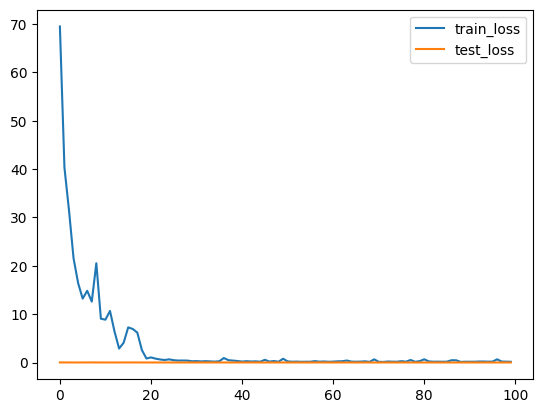

In [11]:
import pandas as pd
results = pd.DataFrame([])
results['train_loss']  = train_record
results['test_loss']  = test_record
results.plot.line(y=['train_loss', 'test_loss'])